In [43]:
import pandas as pd

def expand_and_concat_dicts(df, col):
    """
    Expand a column of dictionaries into separate columns and concatenate with the original dataframe.
    """

    # Expand the column of dictionaries into separate columns
    try:
        expanded_df = pd.DataFrame(df[col].apply(eval).tolist())
    except Exception as e:
        expanded_df = pd.DataFrame(df[col].tolist())
        
    # Rename the columns to avoid duplicates
    expanded_df.columns = [f"{col}_{colname}" for colname in expanded_df.columns]
    
    # Concatenate the expanded dataframe with the original dataframe
    concatenated_df = pd.concat([df, expanded_df], axis=1)
    concatenated_df = concatenated_df.drop(columns=[col])
        
    return concatenated_df

In [44]:
df_llama = pd.read_csv("output/evaluation/Form2/phase_2/llama_3B_inst_std_prompt/complete_evaluation.csv")
df_llama

,filenameid,clinical_case,discharge_summary,human_score,auto_score,feedbacks,scores
0,29617510,An 81-year-old male patient was admitted due t...,**Discharge Summary**\n\n**Patient Information...,"{'Content Relevance': 4, 'Information Complete...","{'precision': 0.8666666088888928, 'recall': 0....","{'Content Relevance': ""'The summary effectivel...","{'Content Relevance': 4, 'Information Complete..."
1,31204375,A 92-year-old man was admitted to our hospital...,**Discharge Summary**\n\n**Patient Information...,"{'Content Relevance': 4, 'Information Complete...","{'precision': 0.3333333055555579, 'recall': 0....","{'Content Relevance': ""'The summary provides a...","{'Content Relevance': 5, 'Information Complete..."
2,30072860_2,A 72-year-old man with a history of hypertensi...,**Discharge Summary**\n\n**Patient Information...,"{'Content Relevance': 4, 'Information Complete...","{'precision': 0.6666666222222252, 'recall': 0....","{'Content Relevance': ""'The response provides ...","{'Content Relevance': 5, 'Information Complete..."
3,31056078,"Initial presentation\nA 55-year-old, Caucasian...",**Discharge Summary**\n\n**Patient Information...,"{'Content Relevance': 5, 'Information Complete...","{'precision': 0.9189188940832732, 'recall': 0....","{'Content Relevance': ""'The provided discharge...","{'Content Relevance': 4, 'Information Complete..."
4,31486515,A 57-year-old Caucasian man was admitted to th...,**Discharge Summary**\n\n**Patient Information...,"{'Content Relevance': 5, 'Information Complete...","{'precision': 0.8275861783590973, 'recall': 0....","{'Content Relevance': ""'The provided discharge...","{'Content Relevance': 5, 'Information Complete..."
5,31512669,A 25-year-old male who presented with acute on...,**Discharge Summary**\n\n**Patient Information...,"{'Content Relevance': 5, 'Information Complete...","{'precision': 0.8888888559670793, 'recall': 0....","{'Content Relevance': 'No feedback provided', ...","{'Content Relevance': 5, 'Information Complete..."
6,32997782,"In March 2017, a 67-year-old man with hyperten...",**Discharge Summary**\n\n**Patient Information...,"{'Content Relevance': 4, 'Information Complete...","{'precision': 0.6666666464646471, 'recall': 0....","{'Content Relevance': ""'The provided discharge...","{'Content Relevance': 5, 'Information Complete..."
7,31557359,"A 61‐year‐old man, diabetic and hypertensive, ...",**Discharge Summary**\n\n**Patient Information...,"{'Content Relevance': 5, 'Information Complete...","{'precision': 0.599999940000006, 'recall': 0.6...","{'Content Relevance': ""'The response provides ...","{'Content Relevance': 5, 'Information Complete..."
8,26989133,A previously fit and healthy 75-year-old Chine...,**Discharge Summary**\n\n**Patient Information...,"{'Content Relevance': 5, 'Information Complete...","{'precision': 0.7499999531250029, 'recall': 0....","{'Content Relevance': 'No feedback provided', ...","{'Content Relevance': 5, 'Information Complete..."
9,31049155,A 30-year-old woman with a history of neonatal...,**Discharge Summary**\n\n**Patient Information...,"{'Content Relevance': 5, 'Information Complete...","{'precision': 0.599999880000024, 'recall': 0.9...","{'Content Relevance': 'No feedback provided', ...","{'Content Relevance': 5, 'Information Complete..."


In [45]:
df_prometheus = pd.read_csv('output/evaluation/Form2/phase_2/prometheus-2-7B/complete_evaluation.csv', dtype={"filenameid": str})
df_prometheus = df_prometheus[["filenameid", "scores"]]
df_llama = pd.read_csv('output/evaluation/Form2/phase_2/llama_3B_inst_std_prompt/complete_evaluation.csv', dtype={"filenameid": str})
df_llama = df_llama[["filenameid", "scores"]]
df_doctor = pd.read_csv('output/evaluation/Form2/phase_2/llama_doctor_3B_inst/complete_evaluation.csv',dtype={"filenameid": str})
df_doctor = df_doctor[["filenameid", "scores"]]

df_doctor
df_gpt = pd.read_csv('output/samples/en/phase_3/gpt4ominihigh_evaluation.tsv', sep='\t', dtype={"filenameid": str})
df_gpt = df_gpt[["filenameid", "scores"]]

cols_eval = ['Content Relevance', 'Information Completeness', 'Clarity and Structure', 'Content Accuracy', 
             'Hallucinations', 'Impact of Hallucinations', 'Relevance to Practice', 'Overall Quality']
df_human = pd.read_csv('output/samples/en/phase_2/human_eval.csv', dtype={"Original file name (e.g. 36951253)": str})
# Rename the columns for consistency
d_names = {
    "Original file name (e.g. 36951253)": "filenameid",
    "Overall validation [Content Relevance]": "Content Relevance",
    "Overall validation [Information Completeness]": "Information Completeness",
    "Overall validation [Clarity and Structure]": "Clarity and Structure",
    "Overall validation [Content Accuracy]": "Content Accuracy",
    "Overall validation [Hallucinations]": "Hallucinations",
    "Overall validation [Impact of Hallucinations]": "Impact of Hallucinations",
    "Overall validation [Relevance to Practice]": "Relevance to Practice",
    "Overall validation [Overall Quality]": "Overall Quality"
}

df_human = df_human.rename(columns=d_names)
df_human["scores"] = df_human[cols_eval].apply(lambda x: x.to_dict(), axis=1)
df_human = df_human[["filenameid", "scores"]]

df_leti = df_human.copy()
# df_human
# cols_eval = ["Medical Entities Completeness", "Structure - Headers", "Structure - Content",	"Content Accuracy",	"Made-up Content",	"Overall Quality"]
# df_human = pd.read_csv('output/samples/en/phase_3/human_eval.tsv', sep='\t', dtype={"doc_id": str})
# df_human = df_human.rename(columns={"doc_id": "filenameid"})
# df_human["scores"] = df_human[cols_eval].apply(lambda x: x.to_dict(), axis=1)
# df_human = df_human[["filenameid", "scores", "annotator"]]
# df_laura = df_human.loc[df_human["annotator"] == "Laura", ["filenameid", "scores"]].reset_index(drop=True)
# df_leti = df_human.loc[df_human["annotator"] == "Leti", ["filenameid", "scores"]].reset_index(drop=True)

df_auto = pd.read_csv('output/samples/en/phase_2/auto_eval.csv', dtype={"filenameid": str})

print(df_prometheus.shape, df_llama.shape, df_doctor.shape, df_leti.shape)

(15, 2) (15, 2) (15, 2) (15, 2)


In [46]:
df_human["scores"]

0     {'Content Relevance': 1, 'Information Complete...
1     {'Content Relevance': 5, 'Information Complete...
2     {'Content Relevance': 4, 'Information Complete...
3     {'Content Relevance': 5, 'Information Complete...
4     {'Content Relevance': 1, 'Information Complete...
5     {'Content Relevance': 5, 'Information Complete...
6     {'Content Relevance': 4, 'Information Complete...
7     {'Content Relevance': 4, 'Information Complete...
8     {'Content Relevance': 4, 'Information Complete...
9     {'Content Relevance': 5, 'Information Complete...
10    {'Content Relevance': 5, 'Information Complete...
11    {'Content Relevance': 4, 'Information Complete...
12    {'Content Relevance': 5, 'Information Complete...
13    {'Content Relevance': 5, 'Information Complete...
14    {'Content Relevance': 5, 'Information Complete...
Name: scores, dtype: object

In [47]:
df_sc_prometheus = expand_and_concat_dicts(df_prometheus, "scores")
df_sc_llama = expand_and_concat_dicts(df_llama, "scores")
df_sc_doctor = expand_and_concat_dicts(df_doctor, "scores")
df_sc_gpt = expand_and_concat_dicts(df_gpt, "scores")
# df_sc_human_laura = expand_and_concat_dicts(df_laura, "scores")
df_sc_human_leti = expand_and_concat_dicts(df_leti, "scores")

d_dataframes = {
    "prometheus": df_sc_prometheus,
    "llama": df_sc_llama,
    "doctor": df_sc_doctor,
    "gpt": df_sc_gpt,
    # "Annotator A": df_sc_human_laura,
    "Annotator B": df_sc_human_leti,
    "leti": df_sc_human_leti,
}

In [48]:
from sklearn.metrics import cohen_kappa_score
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


ls_cols = df_sc_human_leti.columns.tolist()
ls_cols.remove("filenameid")

def compute_kappa(name1, name2, **kwargs):
    df1 = d_dataframes[name1]
    df2 = d_dataframes[name2]
    d_out = {}
    for col in ls_cols:
        suf_1 = "_" + name1
        suf_2 = "_" + name2
        df_total = df1.merge(df2, on="filenameid", suffixes=(suf_1, suf_2))
        kappa = cohen_kappa_score(df_total[col+suf_1].values, df_total[col+suf_2].values, labels=[1, 2, 3, 4, 5], **kwargs)
        # print(f"cohen_kappa_score {col} Laura vs GPT: {kappa:.2f}")
        d_out[col] = kappa
    return d_out

def compute_agreement(name1, name2, field):
    
    df_agreement = pd.DataFrame(np.zeros((5,5)), columns=list(range(1, 6)), index=list(range(1, 6)), dtype=int)
    
    df1 = d_dataframes[name1]
    df2 = d_dataframes[name2]
    
    # for col in ["scores_Medical Entities Completeness"]:
    suf_1 = "_" + name1
    suf_2 = "_" + name2
    df_total = df1.merge(df2, on="filenameid", suffixes=(suf_1, suf_2))
    for idx, row in df_total.iterrows():
        val1 = row[field + suf_1]
        val2 = row[field + suf_2]
        df_agreement.loc[val1, val2] += 1
            
    return df_agreement

def plot_heatmap(df, ax, vmin=-1, vmax=1, title=None, xlabel=None, y_label=None, figsize=(5, 5), fmt=".2f"):

    # Create a heatmap using seaborn
    plt.figure(figsize=figsize)
    sns.heatmap(df, annot=True, fmt=fmt, cmap="coolwarm", cbar=True, vmin=vmin, vmax=vmax,ax=ax);

    if title is not None:
        ax.set_title(title);
    if xlabel is not None:
        ax.set_xlabel(xlabel);
    if y_label is not None:
        ax.set_ylabel(y_label);
        
ls_names = ["prometheus", "llama", "doctor", "Annotator B"]
combs = combinations(ls_names, 2)
d_kappa = {}
for name1, name2 in combs:
    if name1 == "Annotator B" or name2 == "Annotator B":
        d_kappa[f"{name1}_{name2}"] = compute_kappa(name1, name2, weights="linear")

df_kappa = pd.DataFrame(d_kappa)

df_kappa

,prometheus_Annotator B,llama_Annotator B,doctor_Annotator B
scores_Content Relevance,0.142857,0.090909,0.000000
scores_Information Completeness,0.021739,-0.082474,-0.063830
scores_Clarity and Structure,0.161491,0.250000,0.257426
scores_Content Accuracy,0.102564,-0.086957,0.058577
scores_Hallucinations,0.000000,0.000000,0.000000
scores_Impact of Hallucinations,0.000000,0.000000,0.000000
scores_Relevance to Practice,0.065934,-0.043956,0.235669
scores_Overall Quality,0.090909,-0.018100,0.048780


In [58]:
field = "scores_Medical Entities Completeness"

def plot_agreement_heatmap(annotator, field, figsize):
    # df_ag_ann_gpt = compute_agreement(annotator, "gpt", field)
    df_ag_ann_llama = compute_agreement(annotator, "llama", field)
    df_ag_ann_doctor = compute_agreement(annotator, "doctor", field)
    df_ag_ann_prometheus = compute_agreement(annotator, "prometheus", field)

    # Plot both in a subplot
    fig, axs = plt.subplots(1, 3, figsize=figsize, sharey=True)
    axs = axs.flatten()
    # plot_heatmap(df_ag_ann_gpt, vmin=0, vmax=30, xlabel="GPT", y_label=annotator, title=f"{annotator} vs GPT", fmt=".0f", ax=axs[0]);
    plot_heatmap(df_ag_ann_llama, vmin=0, vmax=30, xlabel="Llama", y_label=annotator, title=f"{annotator} vs Llama 3.2 3B Inst", fmt=".0f", ax=axs[0]);
    plot_heatmap(df_ag_ann_doctor, vmin=0, vmax=30, xlabel="Doctor", y_label=annotator, title=f"{annotator} vs Llama Doctor", fmt=".0f", ax=axs[1]);
    plot_heatmap(df_ag_ann_prometheus, vmin=0, vmax=30, xlabel="Prometheus", y_label=annotator, title=f"{annotator} A vs Prometheus 2", fmt=".0f", ax=axs[2]);

    field_name = field.split("_")[1]
    fig.suptitle(field_name, fontsize=16)
    fig.tight_layout();

    field_name_filename = field_name.replace(" ", "_").replace("-", "_")
    annotator_filename = annotator.replace(" ", "_").replace("-", "_")
    fig.savefig(f"img/results_analysis/form2/heatmap_agreement_{annotator_filename}_{field_name_filename}.png", dpi=300, bbox_inches='tight')
    


In [59]:
# ls_cols = df_.columns.tolist()
# ls_cols.remove("filenameid")

# annotator = "Annotator A"

# for col in ls_cols:
#     plot_agreement_heatmap(annotator, col, figsize=(6, 5))

In [60]:
ls_cols

['scores_Content Relevance',
 'scores_Information Completeness',
 'scores_Clarity and Structure',
 'scores_Content Accuracy',
 'scores_Hallucinations',
 'scores_Impact of Hallucinations',
 'scores_Relevance to Practice',
 'scores_Overall Quality']

/scratch/tmp/ipykernel_509731/1755378243.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 3, figsize=figsize, sharey=True)


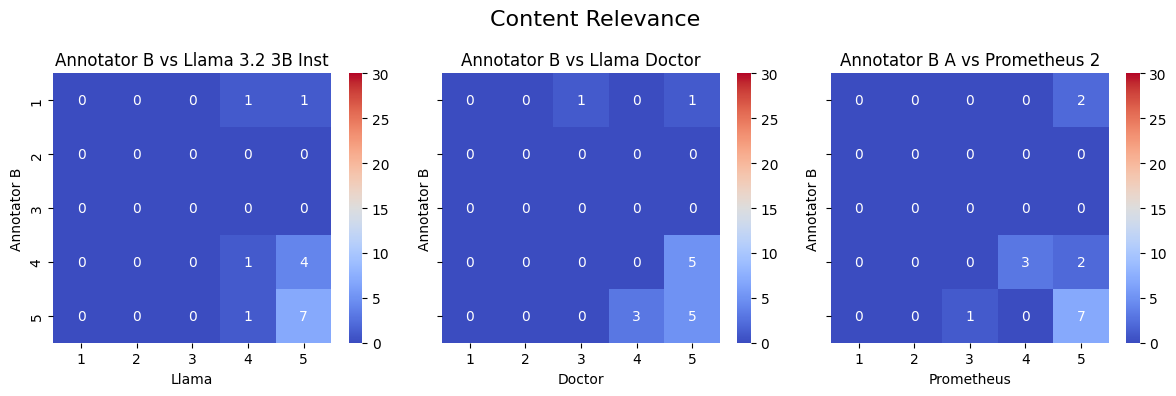

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

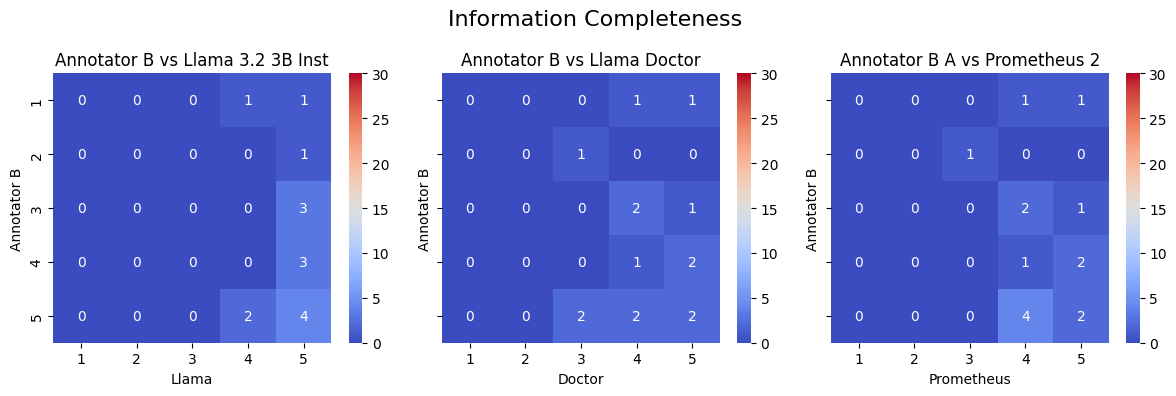

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

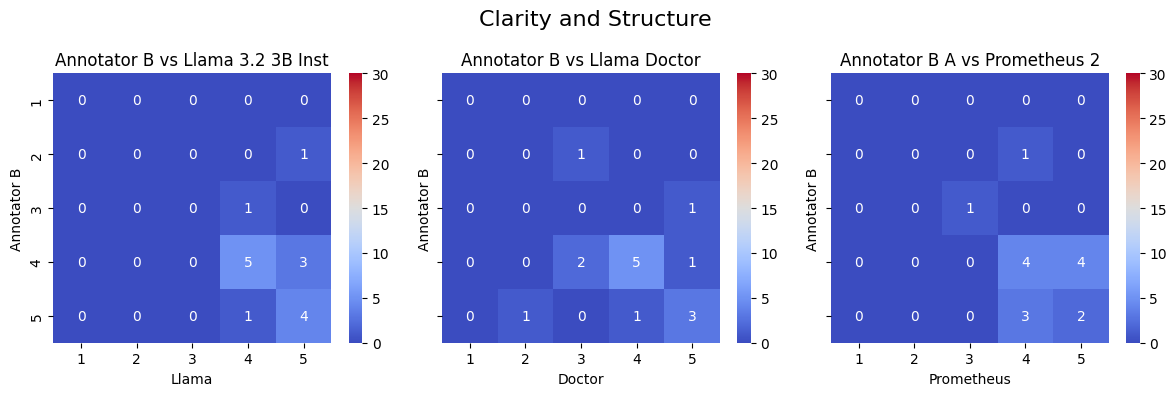

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

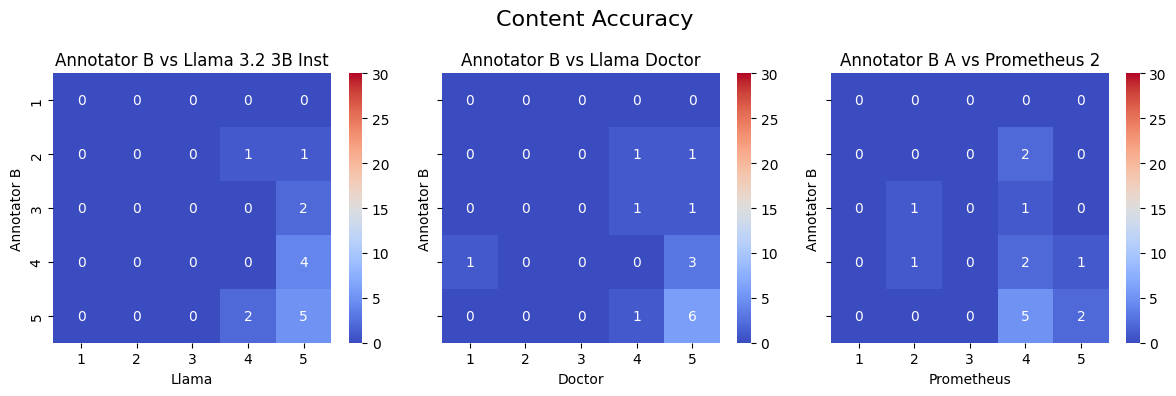

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

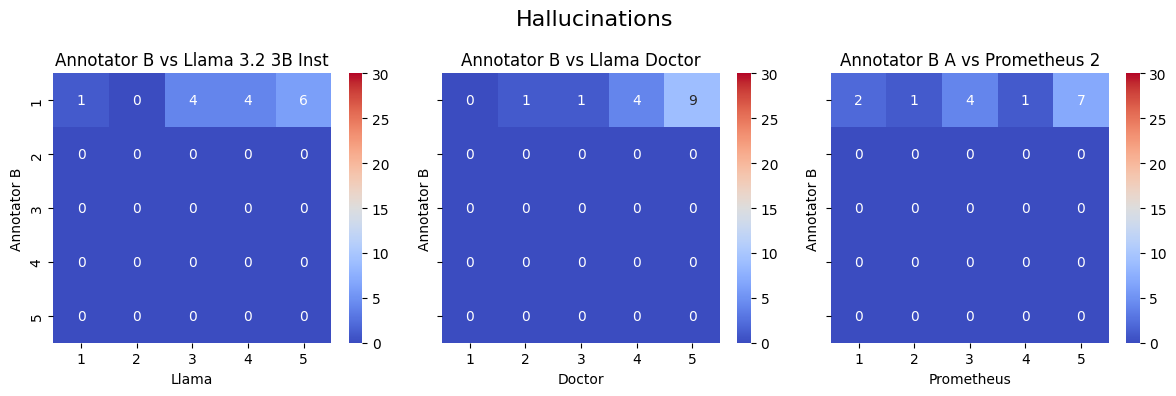

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

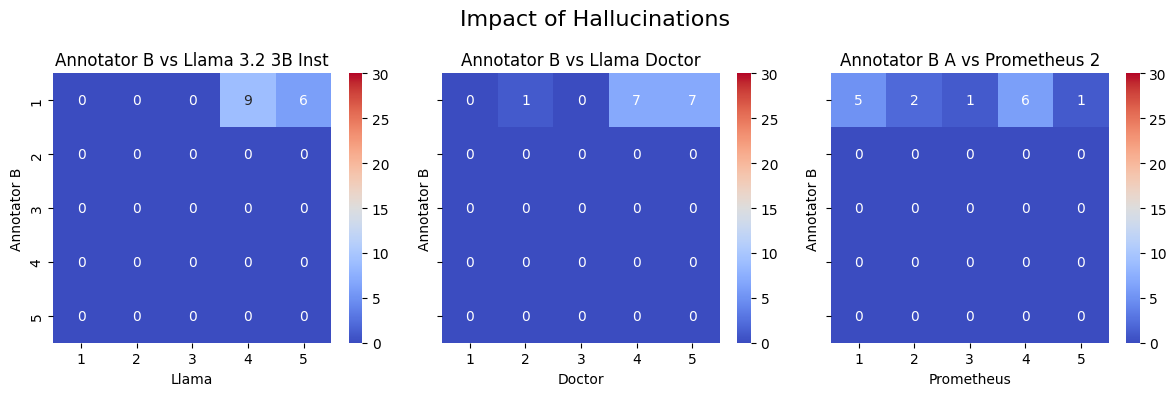

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

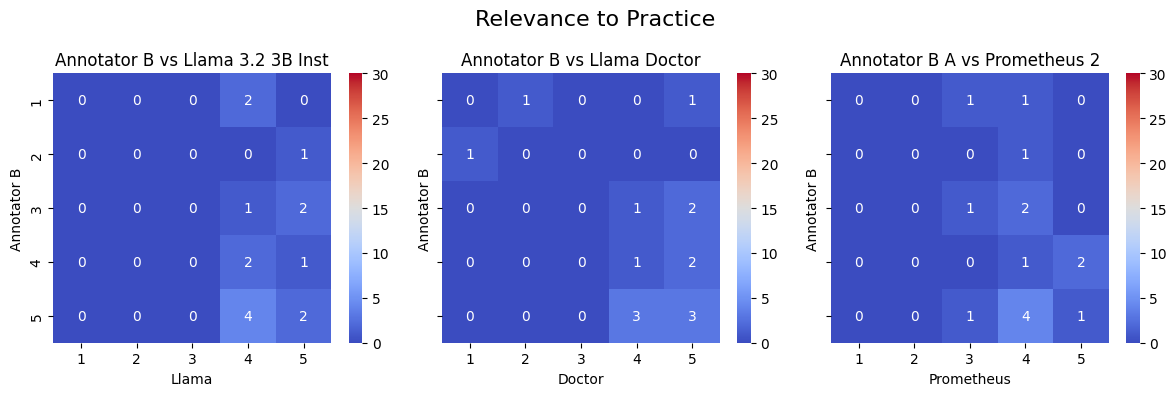

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

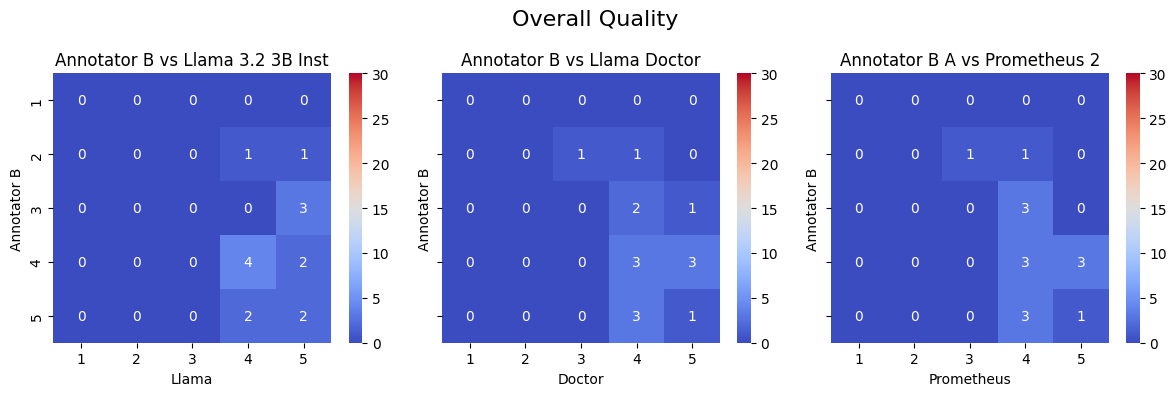

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [61]:
ls_cols = df_sc_human_leti.columns.tolist()
ls_cols.remove("filenameid")

annotator = "Annotator B"

for col in ls_cols:
    # print(f"Plotting agreement heatmap for {annotator} on {col}")
    plot_agreement_heatmap(annotator, col, figsize=(12, 4))

In [ ]:
# ls_cols = df_sc_human_laura.columns.tolist()
# ls_cols.remove("filenameid")

# annotator = "Annotator B"

# for col in ls_cols:
#     plot_agreement_heatmap(annotator, col, figsize=(6, 5))

In [ ]:
field = "scores_Medical Entities Completeness"

df_agreements = pd.DataFrame()
for field in ls_cols:
    ls_pairs = [("Annotator B", "llama"), ("Annotator B", "doctor"), ("Annotator B", "prometheus")]
    d_agreements = {"Annotator B": {}}
    for annotator1, annotator2 in ls_pairs:
        n_agg = compute_agreement(annotator1, annotator2, field).values.diagonal().sum()
        
        d_agreements[f"{annotator1}"][f"{annotator2}"] = n_agg
        
    df_i = pd.DataFrame(d_agreements).T
    df_i["field"] = field.split("_")[1]
    
    df_agreements = pd.concat([df_agreements, df_i], axis=0)
    
df_agreements = df_agreements.reset_index()

In [ ]:
df_agreements.set_index("field", inplace=True)

In [62]:
# df_agreements_ann_A = df_agreements.loc[df_agreements["index"] == "Annotator A"].drop(columns=["index"])
# df_agreements_ann_B = df_agreements.loc[df_agreements["index"] == "Annotator B"].drop(columns=["index"])

df_agreements

,index,llama,doctor,prometheus
field,,,,
Content Relevance,Annotator B,8,5,10
Information Completeness,Annotator B,4,3,3
Clarity and Structure,Annotator B,9,8,7
Content Accuracy,Annotator B,5,6,4
Hallucinations,Annotator B,1,0,2
Impact of Hallucinations,Annotator B,0,0,5
Relevance to Practice,Annotator B,4,4,3
Overall Quality,Annotator B,6,4,4


In [ ]:
df_agreements_ann_A.apply(lambda x: x == x.max(), axis=1).sum(axis=0)

gpt           2
llama         3
doctor        0
prometheus    2
dtype: int64

In [ ]:
df_agreements_ann_B.apply(lambda x: x == x.max(), axis=1).sum(axis=0)

gpt           4
llama         1
doctor        1
prometheus    2
dtype: int64

In [ ]:
# field = "scores_Medical Entities Completeness"

# def plot_agreement_heatmap_annotators(annotator1, annotator2, field, figsize):
    
#     # Plot both in a subplot
#     fig, axs = plt.subplots(2, 3, figsize=figsize, sharex=True, sharey=True)
#     axs = axs.flatten()
#     for i, field in enumerate(ls_cols):
#         df_ag_ann1_ann2 = compute_agreement(annotator1, annotator2, field)
#         # df_ag_ann_llama = compute_agreement(annotator, "llama", field)
#         # df_ag_ann_doctor = compute_agreement(annotator, "doctor", field)
#         # df_ag_ann_prometheus = compute_agreement(annotator, "prometheus", field)


#         # axs = axs.flatten()
#         field_name = field.split("_")[1]

#         plot_heatmap(df_ag_ann1_ann2, vmin=0, vmax=30, xlabel=annotator2, y_label=annotator1, title=f"{field_name}", fmt=".0f", ax=axs[i]);
#         # plot_heatmap(df_ag_ann_llama, vmin=0, vmax=30, xlabel="Llama", y_label=annotator, title=f"{annotator} vs Llama 3.2 3B Inst", fmt=".0f", ax=axs[1]);
#         # plot_heatmap(df_ag_ann_doctor, vmin=0, vmax=30, xlabel="Doctor", y_label=annotator, title=f"{annotator} vs Llama Doctor", fmt=".0f", ax=axs[2]);
#         # plot_heatmap(df_ag_ann_prometheus, vmin=0, vmax=30, xlabel="Prometheus", y_label=annotator, title=f"{annotator} A vs Prometheus 2", fmt=".0f", ax=axs[3]);

#         # fig.suptitle(field_name, fontsize=16)
#         # fig.tight_layout();

#         # field_name_filename = field_name.replace(" ", "_").replace("-", "_")
#     annotator1_filename = annotator1.replace(" ", "_").replace("-", "_")
#     annotator2_filename = annotator2.replace(" ", "_").replace("-", "_")
#     fig.suptitle(f"{annotator1} vs {annotator2}", fontsize=16)
#     fig.tight_layout();
    
#     fig.savefig(f"img/results_analysis/form2/heatmap_agreement_{annotator1_filename}_{annotator2_filename}.png", dpi=300, bbox_inches='tight')
    

# # for col in ls_cols:
# plot_agreement_heatmap_annotators("Annotator A", "Annotator B", col, figsize=(10, 6))

In [ ]:
df_human["scores"][0]

{'Medical Entities Completeness': 5,
 'Structure - Headers': 5,
 'Structure - Content': 5,
 'Content Accuracy': 5,
 'Made-up Content': 5,
 'Overall Quality': 5}

In [ ]:
d_agreements = {}
annotator1 = "Annotator A"
annotator2 = "Annotator B"
for field in ls_cols:
    # ls_pairs = [("Annotator A", "Annotator B")]
    n_agg = compute_agreement(annotator1, annotator2, field).values.diagonal().sum()
    d_agreements[field] = n_agg
        
    # df_i = pd.DataFrame(d_agreements).T
    # df_i["field"] = field.split("_")[1]
    
df_ann_agreements = pd.DataFrame(d_agreements, index=[0]).T.reset_index().rename(columns={"index": "field", 0: "agreement"})

df_ann_agreements["Percentage"] = df_ann_agreements["agreement"] / 30 * 100
d_kappa_ann = compute_kappa("Annotator A", "Annotator B", weights=None)
d_kappa_ann_weighted = compute_kappa("Annotator A", "Annotator B", weights="linear")
df_ann_agreements["Kappa"] = df_ann_agreements["field"].map(d_kappa_ann)
df_ann_agreements["Kappa weighted"] = df_ann_agreements["field"].map(d_kappa_ann_weighted)
df_ann_agreements["field"] = df_ann_agreements["field"].apply(lambda x: x.split("_")[1])

df_ann_agreements

,field,agreement,Percentage,Kappa,Kappa weighted
0,Medical Entities Completeness,22,73.333333,0.599332,0.739884
1,Structure - Headers,17,56.666667,0.194215,0.125767
2,Structure - Content,20,66.666667,0.515347,0.606643
3,Content Accuracy,21,70.000000,0.528796,0.695946
4,Made-up Content,14,46.666667,0.117647,0.149254
5,Overall Quality,15,50.000000,0.286846,0.419355


In [ ]:
d_agreements = {}
annotator1 = "Annotator B"
# annotator2 = "Annotator B"

for annotator2 in ["llama", "doctor", "prometheus"]:
    for field in ls_cols:
        # ls_pairs = [("Annotator A", "Annotator B")]
        n_agg = compute_agreement(annotator1, annotator2, field).values.diagonal().sum()
        d_agreements[field] = n_agg
            
        # df_i = pd.DataFrame(d_agreements).T
        # df_i["field"] = field.split("_")[1]
        
    df_ann_agreements = pd.DataFrame(d_agreements, index=[0]).T.reset_index().rename(columns={"index": "field", 0: "agreement"})

    df_ann_agreements["Percentage"] = df_ann_agreements["agreement"] / 30 * 100
    d_kappa_ann = compute_kappa(annotator1, annotator2, weights=None)
    d_kappa_ann_weighted = compute_kappa(annotator1, annotator2, weights="linear")
    df_ann_agreements["Kappa"] = df_ann_agreements["field"].map(d_kappa_ann)
    df_ann_agreements["Kappa weighted"] = df_ann_agreements["field"].map(d_kappa_ann_weighted)
    df_ann_agreements["field"] = df_ann_agreements["field"].apply(lambda x: x.split("_")[1])

    print(f"Agreement {annotator1} vs {annotator2}")
    print(df_ann_agreements.to_markdown(index=False))
    print("\n")

Agreement Annotator B vs llama
| field                    |   agreement |   Percentage |      Kappa |   Kappa weighted |
|:-------------------------|------------:|-------------:|-----------:|-----------------:|
| Content Relevance        |           8 |     26.6667  |  0.0789474 |        0.0909091 |
| Information Completeness |           4 |     13.3333  | -0.145833  |       -0.0824742 |
| Clarity and Structure    |           9 |     30       |  0.302326  |        0.25      |
| Content Accuracy         |           5 |     16.6667  | -0.162791  |       -0.0869565 |
| Hallucinations           |           1 |      3.33333 |  0         |        0         |
| Impact of Hallucinations |           0 |      0       |  0         |        0         |
| Relevance to Practice    |           4 |     13.3333  | -0.0185185 |       -0.043956  |
| Overall Quality          |           6 |     20       |  0.10596   |       -0.0180995 |


Agreement Annotator B vs doctor
| field                    |   agre

In [ ]:
print(df_ann_agreements.to_latex(index=False, float_format="%.4f"))

\begin{tabular}{lrrrr}
\toprule
field & agreement & Percentage & Kappa & Kappa weighted \\
\midrule
Medical Entities Completeness & 22 & 73.3333 & 0.5993 & 0.7399 \\
Structure - Headers & 17 & 56.6667 & 0.1942 & 0.1258 \\
Structure - Content & 20 & 66.6667 & 0.5153 & 0.6066 \\
Content Accuracy & 21 & 70.0000 & 0.5288 & 0.6959 \\
Made-up Content & 14 & 46.6667 & 0.1176 & 0.1493 \\
Overall Quality & 15 & 50.0000 & 0.2868 & 0.4194 \\
\bottomrule
\end{tabular}



In [ ]:
print(df_ann_agreements.to_latex())

\begin{tabular}{llrrr}
\toprule
 & field & agreement & Percentage & Kappa \\
\midrule
0 & Medical Entities Completeness & 8 & 26.666667 & 0.739884 \\
1 & Structure - Headers & 15 & 50.000000 & 0.125767 \\
2 & Structure - Content & 11 & 36.666667 & 0.606643 \\
3 & Content Accuracy & 14 & 46.666667 & 0.695946 \\
4 & Made-up Content & 17 & 56.666667 & 0.149254 \\
5 & Overall Quality & 9 & 30.000000 & 0.419355 \\
\bottomrule
\end{tabular}



In [ ]:
print(df_agreements_ann_B.to_latex())

\begin{tabular}{lrrrr}
\toprule
 & gpt & llama & doctor & prometheus \\
field &  &  &  &  \\
\midrule
Medical Entities Completeness & 19 & 10 & 5 & 8 \\
Structure - Headers & 16 & 16 & 17 & 15 \\
Structure - Content & 9 & 10 & 9 & 11 \\
Content Accuracy & 15 & 15 & 10 & 14 \\
Made-up Content & 17 & 14 & 11 & 17 \\
Overall Quality & 16 & 11 & 13 & 9 \\
\bottomrule
\end{tabular}

